In [1]:
import matplotlib.pyplot as plt
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.datasets import breast_cancer
from qiskit import Aer
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7]
%config InlineBackend.figure_format = 'retina'

seed = 12345
algorithm_globals.random_seed = seed

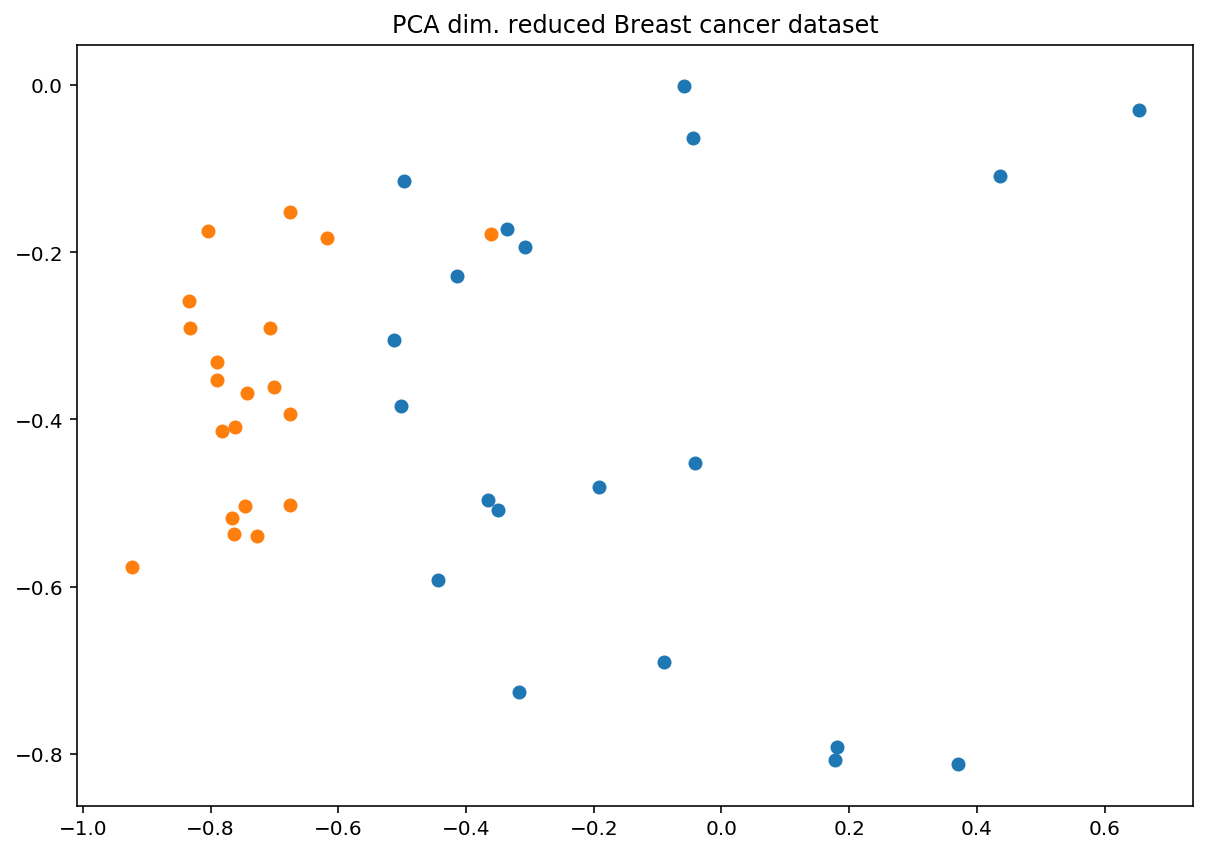

In [2]:
feature_dim = 2

adhoc_dimension = 2

training_feature_array, training_label_array, test_feature_array, test_label_array = breast_cancer(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    plot_data=True,
    one_hot=False,
)

In [3]:
training_feature_array.shape

(40, 2)

In [4]:
training_label_array.shape

(40,)

In [5]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')

backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

kernel = QuantumKernel(feature_map=feature_map, quantum_instance = quantum_instance)

In [6]:
qsvc = QSVC(quantum_kernel = kernel)
qsvc.fit(training_feature_array, training_label_array)

qsvc_score = qsvc.score(test_feature_array, test_label_array)
qsvc_score

0.8

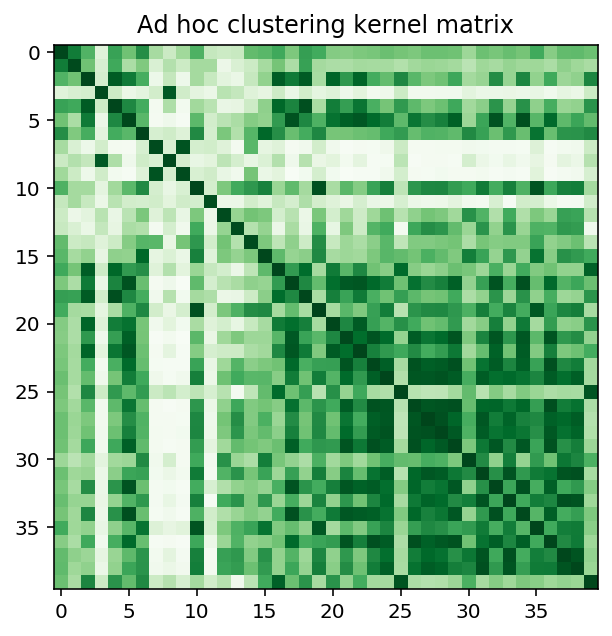

Clustering score: 0.1470821922367239


In [7]:
kernel_matrix = kernel.evaluate(x_vec=training_feature_array)

plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(kernel_matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Ad hoc clustering kernel matrix")
plt.show()

adhoc_spectral = SpectralClustering(2, affinity="precomputed")
cluster_labels = adhoc_spectral.fit_predict(kernel_matrix)
cluster_score = normalized_mutual_info_score(cluster_labels, training_label_array)

print(f"Clustering score: {cluster_score}")

In [8]:
new_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

new_backend = QuantumInstance(
    Aer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

new_kernel = QuantumKernel(feature_map=new_feature_map, quantum_instance=new_backend)

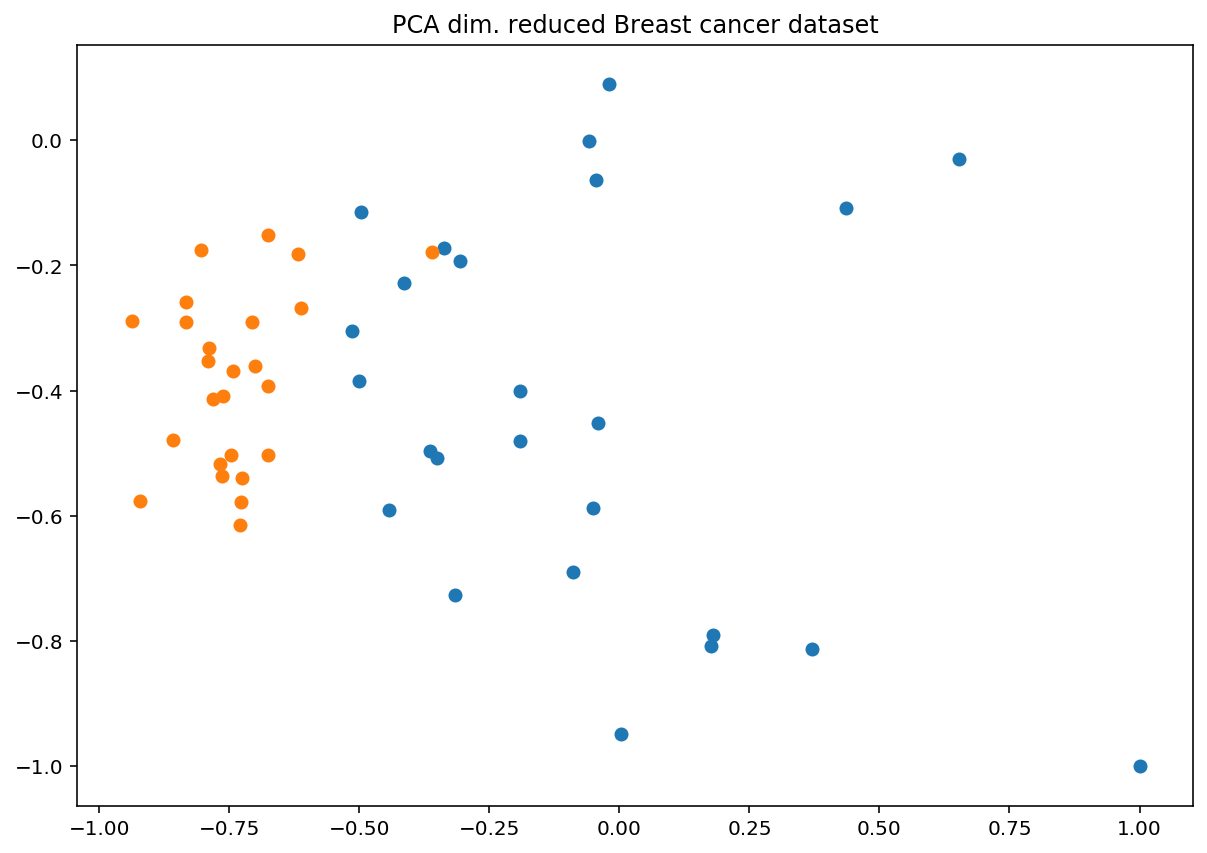

In [9]:
training_feature_array, training_label_array, test_feature_array, test_label_array = breast_cancer(
    training_size=25,
    test_size=0,
    n=adhoc_dimension,
    plot_data=True,
    one_hot=False,
)

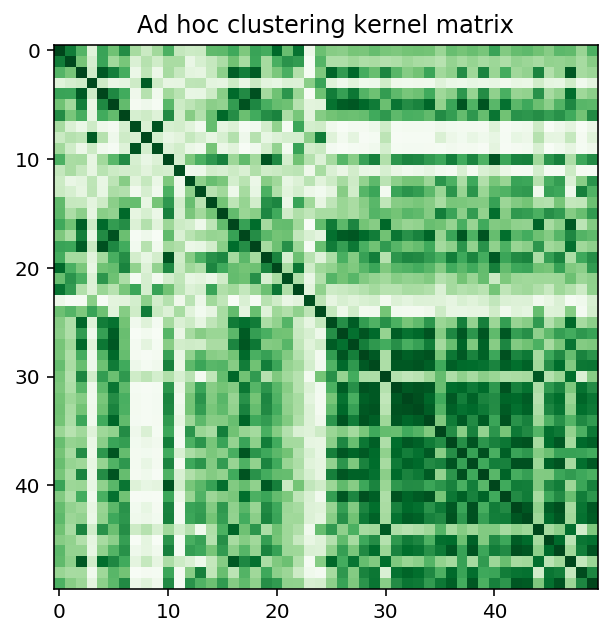

Clustering score: 0.22286943775271806


In [10]:
new_matrix = new_kernel.evaluate(x_vec=training_feature_array)

plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(new_matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Ad hoc clustering kernel matrix")
plt.show()

adhoc_spectral = SpectralClustering(2, affinity="precomputed")
cluster_labels = adhoc_spectral.fit_predict(new_matrix)
cluster_score = normalized_mutual_info_score(cluster_labels, training_label_array)

print(f"Clustering score: {cluster_score}")